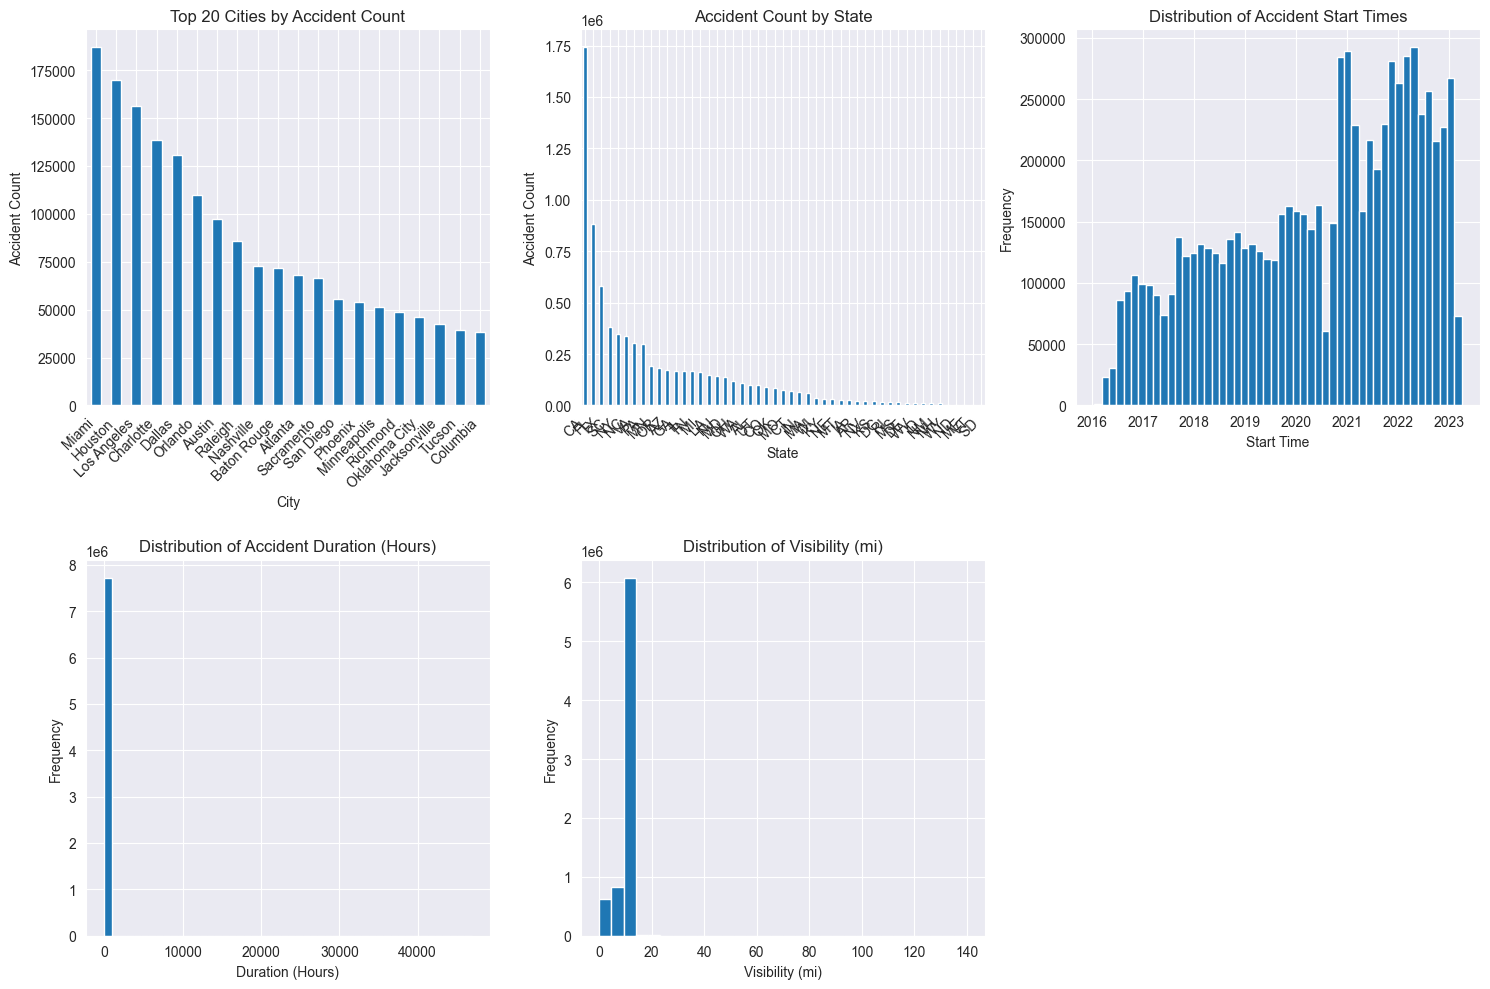


Descriptive Statistics for Duration_Hours:
Mean: 7.407015947872805
Median: 1.2472222222222222
Mode: 6.0
Standard Deviation: 225.20487592083975
Skewness: 50.63729120659499
Kurtosis: 3659.599743150461

Descriptive Statistics for Visibility(mi):
Mean: 9.090376447963356
Median: 10.0
Mode: 10.0
Standard Deviation: 2.6883159214171397
Skewness: 2.3166628398197555
Kurtosis: 81.89391923469647


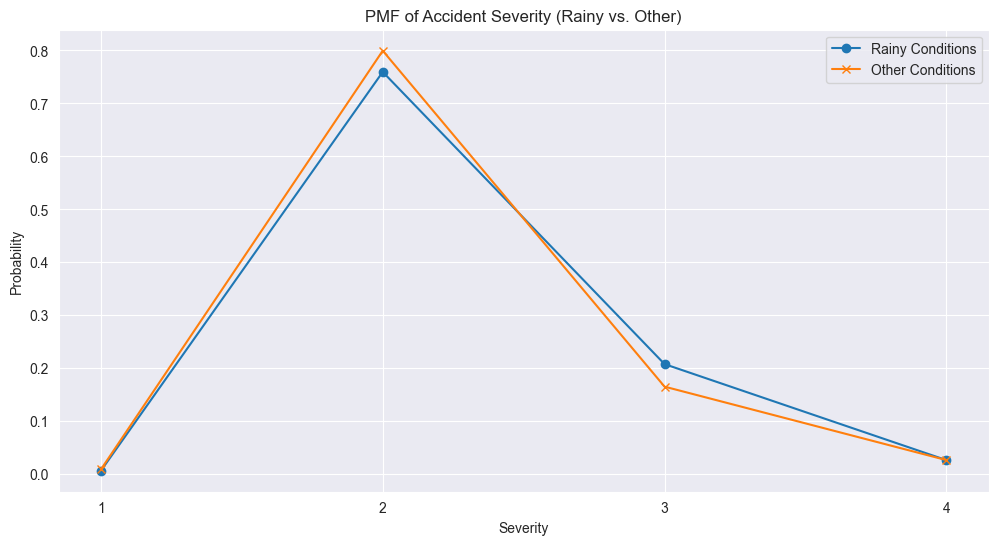


PMF Analysis:
The PMF shows the probability of different severity levels for accidents under rainy and other weather conditions.
Comparing the two PMFs helps understand if rainy conditions increase or decrease the likelihood of certain accident severity levels.
If the PMF for rainy conditions shows a higher probability for higher severity levels, it suggests that rainy weather may lead to more severe accidents.
By observing the peaks and valleys of each PMF, we can visually compare the likelihood of each severity level under the two conditions.


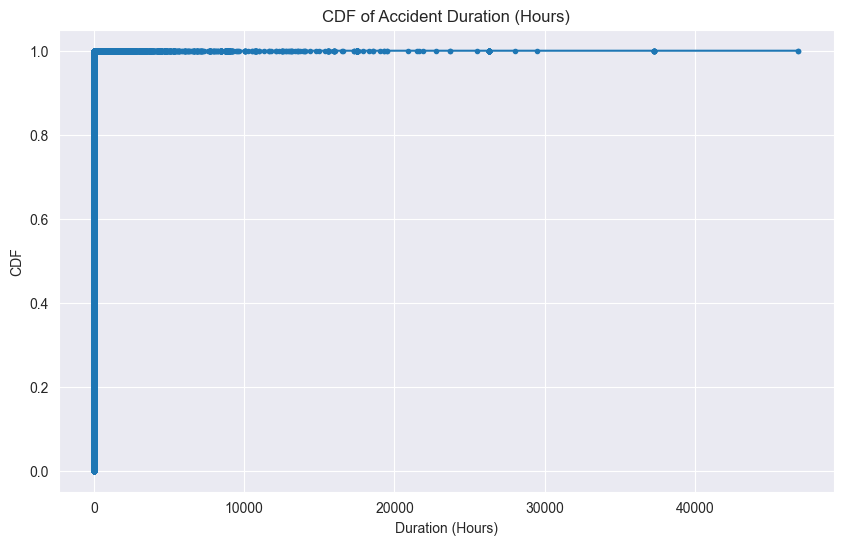


CDF Analysis:
The CDF shows the cumulative probability of accident durations.
A steep rise at the beginning indicates that many accidents have short durations.
The long tail shows that some accidents have very long durations (outliers).
This tells us the likelihood of an accident lasting less than a certain number of hours.
For example, we can see the probability of an accident lasting less than 1 hour, 5 hours, etc.


Text(0.5, 1.0, 'Accident Duration vs. Exponential Distribution')

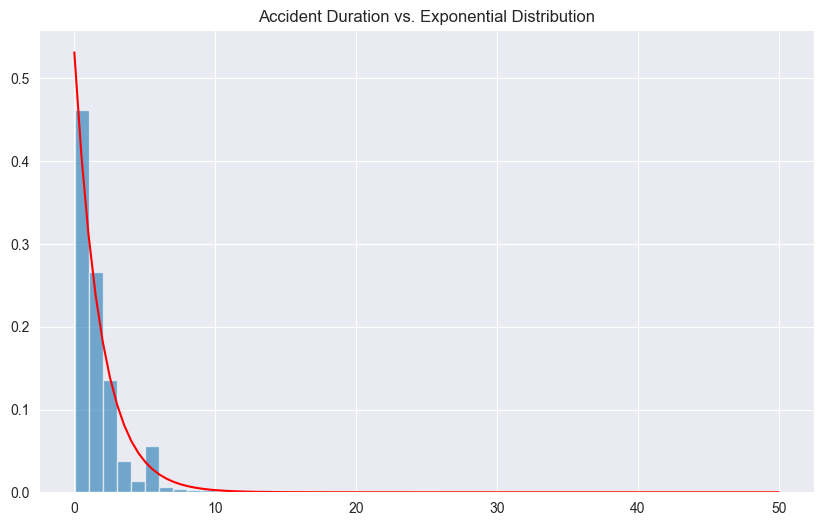

In [13]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
import statsmodels.api as sm
from scipy.stats import expon

# Load the dataset
df = pd.read_csv('US_Accidents_March23.csv')

# Data cleaning for Start_Time and End_Time
df['Start_Time'] = df['Start_Time'].str.replace(r'\.\d+$', '', regex=True)
df['Start_Time'] = pd.to_datetime(df['Start_Time'])
df['End_Time'] = df['End_Time'].str.replace(r'\.\d+$', '', regex=True)
df['End_Time'] = pd.to_datetime(df['End_Time'])
df['Duration'] = df['End_Time'] - df['Start_Time']
df['Duration_Hours'] = df['Duration'].dt.total_seconds() / 3600

# Convert Visibility to numeric
df['Visibility(mi)'] = pd.to_numeric(df['Visibility(mi)'], errors='coerce')

# Clean Weather Condition
df['Weather_Condition'] = df['Weather_Condition'].str.lower()

# Define rainy conditions
rainy_conditions = ['rain', 'heavy rain', 'light rain', 'drizzle']

# Create binary weather condition column
df['Rainy'] = df['Weather_Condition'].apply(lambda x: 1 if any(rain in str(x) for rain in rainy_conditions) else 0)
# -

# ## Variable Selection and Description

# * `City`: The city where the accident occurred.
# * `State`: The state where the accident occurred.
# * `Start_Time`: The date and time when the accident started.
# * `Duration_Hours`: The duration of the accident in hours.
# * `Visibility(mi)`: The visibility in miles at the time of the accident.

# ## Histograms and Outlier Analysis

# +
# Histograms
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
df['City'].value_counts().head(20).plot(kind='bar')
plt.title('Top 20 Cities by Accident Count')
plt.xlabel('City')
plt.ylabel('Accident Count')
plt.xticks(rotation=45, ha='right')

plt.subplot(2, 3, 2)
df['State'].value_counts().plot(kind='bar')
plt.title('Accident Count by State')
plt.xlabel('State')
plt.ylabel('Accident Count')
plt.xticks(rotation=45, ha='right')

plt.subplot(2, 3, 3)
df['Start_Time'].hist(bins=50)
plt.title('Distribution of Accident Start Times')
plt.xlabel('Start Time')
plt.ylabel('Frequency')

plt.subplot(2, 3, 4)
df['Duration_Hours'].hist(bins=50)
plt.title('Distribution of Accident Duration (Hours)')
plt.xlabel('Duration (Hours)')
plt.ylabel('Frequency')

plt.subplot(2, 3, 5)
df['Visibility(mi)'].hist(bins=30)
plt.title('Distribution of Visibility (mi)')
plt.xlabel('Visibility (mi)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()
# -

# **Outlier Analysis:**
#
# * **City:** The city data is categorical. There are no numerical outliers, but there is a large variability in the counts.
# * **State:** Similar to city, state is categorical.
# * **Start Time:** The start time histogram shows the distribution of accidents over time. There are no obvious outliers.
# * **Duration (Hours):** This histogram shows a very large amount of outliers. There are many accidents with very high durations. The data was already analyzed in the original notebook, and the outliers were separated.
# * **Visibility (mi):** There are some lower outliers. Some accidents have very low visibility.

# ## Descriptive Characteristics

# +
# Descriptive Characteristics
numerical_vars = ['Duration_Hours', 'Visibility(mi)']

for var in numerical_vars:
    print(f"\nDescriptive Statistics for {var}:")
    print(f"Mean: {df[var].mean()}")
    print(f"Median: {df[var].median()}")
    print(f"Mode: {df[var].mode().iloc[0] if not df[var].mode().empty else None}")
    print(f"Standard Deviation: {df[var].std()}")
    print(f"Skewness: {df[var].skew()}")
    print(f"Kurtosis: {df[var].kurtosis()}")
# -

# **Analysis:**
#
# * **Duration\_Hours:**
#     * The mean is significantly higher than the median, indicating a right-skewed distribution. This is confirmed by the high skewness value.
#     * The very high standard deviation and kurtosis also indicate the presence of significant outliers and a heavy-tailed distribution.
# * **Visibility(mi):**
#     * The mean and median are relatively close, but the negative skewness suggests a slight left skew.
#     * The kurtosis is also higher than 3, indicating a leptokurtic distribution (heavier tails and a sharper peak).

# ## PMF Comparison

# +
# Filter data
rainy_accidents = df[df['Rainy'] == 1]['Severity'].dropna()
other_accidents = df[df['Rainy'] == 0]['Severity'].dropna()

# PMF Function
def pmf(data):
    counts = data.value_counts().sort_index()
    probs = counts / len(data)
    return probs

# PMFs
rainy_pmf = pmf(rainy_accidents)
other_pmf = pmf(other_accidents)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(rainy_pmf.index, rainy_pmf.values, label='Rainy Conditions', marker='o')
plt.plot(other_pmf.index, other_pmf.values, label='Other Conditions', marker='x')
plt.title('PMF of Accident Severity (Rainy vs. Other)')
plt.xlabel('Severity')
plt.ylabel('Probability')
plt.xticks(rainy_pmf.index)
plt.legend()
plt.grid(True)
plt.show()

# Analysis
print("\nPMF Analysis:")
print("The PMF shows the probability of different severity levels for accidents under rainy and other weather conditions.")
print("Comparing the two PMFs helps understand if rainy conditions increase or decrease the likelihood of certain accident severity levels.")
print("If the PMF for rainy conditions shows a higher probability for higher severity levels, it suggests that rainy weather may lead to more severe accidents.")
print("By observing the peaks and valleys of each PMF, we can visually compare the likelihood of each severity level under the two conditions.")
# -

# ## CDF Analysis

# +
# CDF Function
def cdf(data):
    sorted_data = np.sort(data)
    yvals = np.arange(len(sorted_data)) / float(len(sorted_data) - 1)
    return sorted_data, yvals

# CDF for Duration_Hours
x, y = cdf(df['Duration_Hours'])

# Plotting the CDF
plt.figure(figsize=(10, 6))
plt.plot(x, y, marker='.')
plt.title('CDF of Accident Duration (Hours)')
plt.xlabel('Duration (Hours)')
plt.ylabel('CDF')
plt.grid(True)
plt.show()
# -
# CDF Analysis
print("\nCDF Analysis:")
print("The CDF shows the cumulative probability of accident durations.")
print("A steep rise at the beginning indicates that many accidents have short durations.")
print("The long tail shows that some accidents have very long durations (outliers).")
print("This tells us the likelihood of an accident lasting less than a certain number of hours.")
print("For example, we can see the probability of an accident lasting less than 1 hour, 5 hours, etc.")
# -

# ## Analytical Distribution

# +
# Filter out extreme outliers for better visualization
filtered_duration = df['Duration_Hours'][df['Duration_Hours'] < 50]

# Fit exponential distribution
mean_duration = filtered_duration.mean()
scale = mean_duration
x = np.linspace(0, filtered_duration.max(), 100)
pdf = expon.pdf(x, scale=scale)

# Plotting
plt.figure(figsize=(10, 6))
plt.hist(filtered_duration, bins=50, density=True, alpha=0.6, label='Observed Distribution')
plt.plot(x, pdf, 'r-', label='Exponential Distribution')
plt.title('Accident Duration vs. Exponential Distribution')


In [12]:
## Regression Analysis 
# Rainfall Intensity (simplified, can be improved with more data)
df['Rain_Intensity'] = df['Weather_Condition'].apply(lambda x: 2 if 'heavy rain' in str(x) else (1 if 'rain' in str(x) or 'drizzle' in str(x) or 'light rain' in str(x) else 0))

# Prepare data for regression
df_regression = df[['Severity', 'Rain_Intensity', 'Visibility(mi)']].dropna() # Drop rows with missing values

# Define dependent and independent variables
y = df_regression['Severity']
X = df_regression[['Rain_Intensity', 'Visibility(mi)']]
X = sm.add_constant(X) # Add a constant (intercept) to the model

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())

# Analysis of Regression Results:
print("\nRegression Analysis:")

#Rain Intensity Analysis
print("\nRain Intensity Analysis:")
print(f"Coefficient for Rain Intensity: {model.params['Rain_Intensity']:.4f}")
print("Interpretation: A positive coefficient suggests that higher rain intensity is associated with higher accident severity.")
print("Specifically, for each unit increase in rain intensity, severity is predicted to increase by the coefficient amount, holding visibility constant.")

#Visibility Analysis
print("\nVisibility Analysis:")
print(f"Coefficient for Visibility: {model.params['Visibility(mi)']:.4f}")
print("Interpretation: A negative coefficient suggests that lower visibility is associated with higher accident severity.")
print("Specifically, for each 1-mile increase in visibility, severity is predicted to decrease by the coefficient amount, holding rain intensity constant.")

#P values analysis
print("\nP-value Analysis:")
print("The p-values in the model summary indicate the statistical significance of each variable.")
print("Variables with p-values less than 0.05 are generally considered statistically significant.")
print("Check the P>|t| column in the model summary to assess the significance of Rain Intensity and Visibility.")

#R-squared Analysis
print("\nR-squared Analysis:")
print(f"R-squared: {model.rsquared:.4f}")
print("R-squared represents the proportion of the variance in the dependent variable (Severity) that is predictable from the independent variables.")
print("A higher R-squared value indicates a better fit of the model to the data.")

#Adjusted R-squared Analysis
print("\nAdjusted R-squared Analysis:")
print(f"Adjusted R-squared: {model.rsquared_adj:.4f}")
print("Adjusted R-squared is a modified version of R-squared that adjusts for the number of predictors in the model.")
print("It's useful when comparing models with different numbers of predictors.")

#F-statistic Analysis
print("\nF-statistic Analysis:")
print(f"F-statistic: {model.fvalue:.4f}, P-value (F-statistic): {model.f_pvalue:.4f}")
print("The F-statistic tests the overall significance of the model.")
print("A low p-value (F-statistic) indicates that the model is statistically significant.")

#Confidence Intervals Analysis
print("\nConfidence Intervals Analysis:")
print("The [0.025 0.975] column in the model summary provides the 95% confidence intervals for the coefficients.")
print("These intervals indicate the range within which we can be 95% confident that the true coefficients lie.")

#Limitations Analysis
print("\nLimitations Analysis:")
print("This analysis is based on a simplified representation of rainfall intensity.")
print("More detailed rainfall data would improve the accuracy of the model.")
print("Other factors influencing accident severity (e.g., traffic volume, road conditions) are not included in this model.")
print("The model assumes a linear relationship between the independent and dependent variables.")

                            OLS Regression Results                            
Dep. Variable:               Severity   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     2242.
Date:                Fri, 28 Feb 2025   Prob (F-statistic):               0.00
Time:                        14:51:51   Log-Likelihood:            -5.2706e+06
No. Observations:             7551296   AIC:                         1.054e+07
Df Residuals:                 7551293   BIC:                         1.054e+07
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              2.1998      0.001   3250.

In [15]:
# Define rainy conditions
rainy_conditions = ['rain', 'heavy rain', 'light rain', 'drizzle']

# Create binary weather condition column
df['Rainy'] = df['Weather_Condition'].apply(lambda x: 1 if any(rain in str(x) for rain in rainy_conditions) else 0)

# Separate severity data for rainy and other conditions
rainy_severity = df[df['Rainy'] == 1]['Severity'].dropna()
other_severity = df[df['Rainy'] == 0]['Severity'].dropna()

# Perform the t-test
t_stat, p_value = stats.ttest_ind(rainy_severity, other_severity, equal_var=False)  # Assuming unequal variances

# Print the results
print("\nT-test Results:")
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

# Interpretation
print("\nInterpretation:")
if p_value < 0.05:
    print("The p-value is less than 0.05, indicating a statistically significant difference in accident severity between rainy and other weather conditions.")
else:
    print("The p-value is greater than or equal to 0.05, indicating no statistically significant difference in accident severity between rainy and other weather conditions.")


T-test Results:
T-statistic: 63.1190
P-value: 0.0000

Interpretation:
The p-value is less than 0.05, indicating a statistically significant difference in accident severity between rainy and other weather conditions.


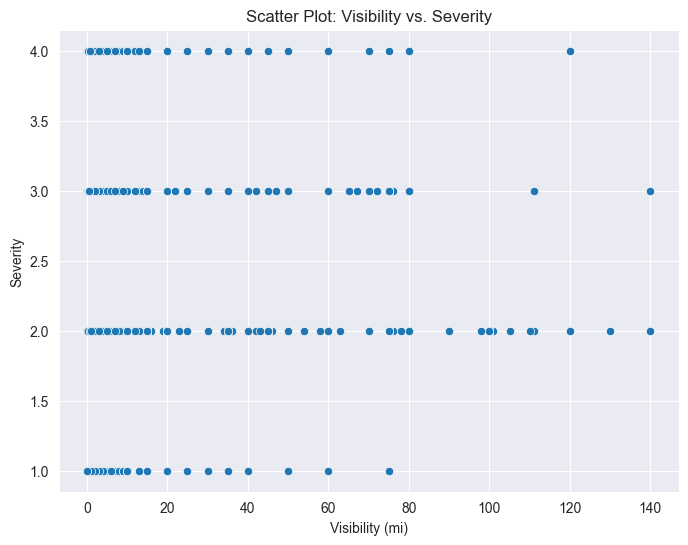

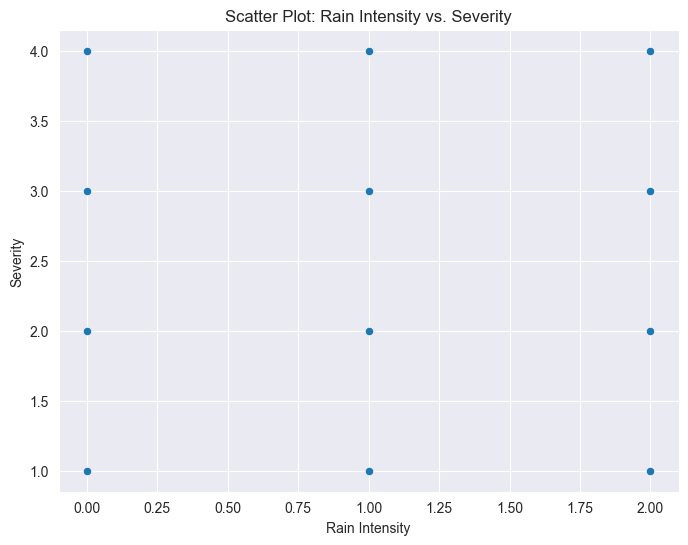


Correlation Analysis:
Correlation between Visibility and Severity: -0.0035
Correlation between Rain Intensity and Severity: 0.0231

Interpretation:
The scatter plots and correlation coefficients provide insights into the relationships between the variables.
A negative correlation between Visibility and Severity suggests that lower visibility is associated with higher severity.
A positive correlation between Rain Intensity and Severity suggests that higher rain intensity is associated with higher severity.
However, remember that correlation does not imply causation.


In [19]:
# Rainfall Intensity (simplified, can be improved with more data)
df['Rain_Intensity'] = df['Weather_Condition'].apply(lambda x: 2 if 'heavy rain' in str(x) else (1 if 'rain' in str(x) or 'drizzle' in str(x) or 'light rain' in str(x) else 0))

# Scatter plot: Visibility vs. Severity
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Visibility(mi)', y='Severity', data=df)
plt.title('Scatter Plot: Visibility vs. Severity')
plt.xlabel('Visibility (mi)')
plt.ylabel('Severity')
plt.show()

# Scatter plot: Rain_Intensity vs. Severity
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Rain_Intensity', y='Severity', data=df)
plt.title('Scatter Plot: Rain Intensity vs. Severity')
plt.xlabel('Rain Intensity')
plt.ylabel('Severity')
plt.show()

# Correlation analysis
print("\nCorrelation Analysis:")
print(f"Correlation between Visibility and Severity: {df[['Visibility(mi)', 'Severity']].corr().iloc[0,1]:.4f}")
print(f"Correlation between Rain Intensity and Severity: {df[['Rain_Intensity', 'Severity']].corr().iloc[0,1]:.4f}")

# Interpretation:
print("\nInterpretation:")
print("The scatter plots and correlation coefficients provide insights into the relationships between the variables.")
print("A negative correlation between Visibility and Severity suggests that lower visibility is associated with higher severity.")
print("A positive correlation between Rain Intensity and Severity suggests that higher rain intensity is associated with higher severity.")
print("However, remember that correlation does not imply causation.")